<a href="https://colab.research.google.com/github/Muhammad-Azham-Oman/AI_Portfolio/blob/main/temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/temperaturedataset/temperature.csv'))

In [ ]:
data['Hourly_Temp'].describe()

,Hourly_Temp
count,7056.000000
mean,21.867468
std,6.737313
min,5.350000
25%,18.400000
50%,24.033000
75%,26.333000
max,36.500000


In [ ]:
data['Datetime']

,Datetime
0,04-01-2022 00:00
1,04-01-2022 01:00
2,04-01-2022 02:00
3,04-01-2022 03:00
4,04-01-2022 04:00
...,...
7051,24-10-2022 19:00
7052,24-10-2022 20:00
7053,24-10-2022 21:00
7054,24-10-2022 22:00


In [ ]:
data = data.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
data.head()

,Datetime,Hourly_Temp
0,04-01-2022 00:00,20.867
1,04-01-2022 01:00,21.000
2,04-01-2022 02:00,20.867
3,04-01-2022 03:00,20.650
4,04-01-2022 04:00,20.400


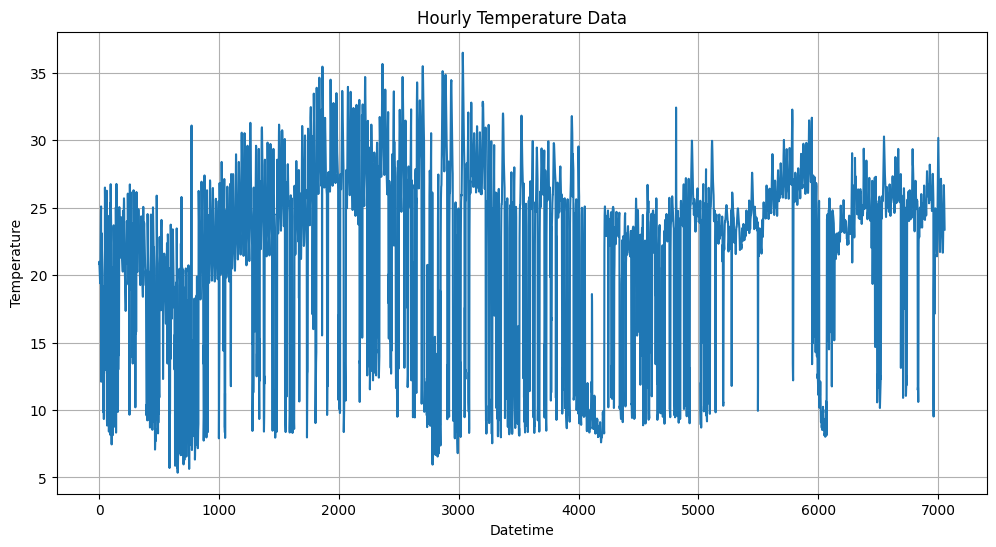

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Hourly_Temp'])
plt.title("Hourly Temperature Data")
plt.xlabel('Datetime')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [ ]:
def chk_stationary(tseries):

  testdf = adfuller(tseries, autolag='AIC')

  dataout = pd.Series(testdf[0:4], index= ['Test statistics','p-value','#Lag used','Number of observations'])

  for key, val in testdf[4].items():
    dataout["critical Values (%s)" %key] = val

  return dataout

result = chk_stationary(data['Hourly_Temp'])

print(" Augmented Adfuller ")
print(result)

 Augmented Adfuller 
Test statistics          -9.396891e+00
p-value                   6.338903e-16
#Lag used                 2.500000e+01
Number of observations    7.030000e+03
critical Values (1%)     -3.431281e+00
critical Values (5%)     -2.861951e+00
critical Values (10%)    -2.566989e+00
dtype: float64


In [ ]:
# this step used when the data is no stationary
data['diff_temp'] = data['Hourly_Temp'] - data['Hourly_Temp'].shift(1)
data.dropna(inplace=True)

In [ ]:
model = SARIMAX(data['Hourly_Temp'], order=(1,1,1), seasonal_order=(1,1,1,24))

model = model.fit(disp=False)

print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        Hourly_Temp   No. Observations:                 7055
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 24)   Log Likelihood              -17060.311
Date:                            Fri, 18 Jul 2025   AIC                          34130.623
Time:                                    11:49:42   BIC                          34164.913
Sample:                                         0   HQIC                         34142.436
                                           - 7055                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1153      0.133     -0.870      0.384      -0.375       0.145
ma.L1          0.1846      0.130   

In [ ]:
forcast_steps = 24
forcast = model.get_forecast(steps=24)

In [ ]:
data_range = pd.date_range(start=data.index[-1],periods=forcast_steps+1,freq='H')

In [ ]:
forcast_values = forcast.predicted_mean
forcast_conf_int = forcast.conf_int

In [ ]:
forcast_data = pd.DataFrame({'forcast_values':forcast_values})

In [ ]:
forcast_data

,forcast_values
7055,23.352777
7056,23.050824
7057,21.575431
7058,21.395745
7059,21.940350
7060,22.190751
7061,22.295168
7062,22.326692
7063,22.356281
7064,22.387701
